In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import re

In [2]:
data_maddow = pd.read_csv('data/Maddow_cleaned.tsv',sep='\t').drop(columns=['Unnamed: 0'])
data_carlson = pd.read_csv('data/Carlson_cleaned.tsv',sep='\t').drop(columns=['Unnamed: 0'])

### Word Count

In [3]:
def word_count(text):
    # split the text into words and convert them to lowercase
    words = [word.lower() for word in text.split()]

    # use the Counter class to count the occurrences of each word
    word_counts = Counter(words)

    # return the word counts
    return dict(word_counts)

In [4]:
# add a word count dictionary to each of the transcript files 
data_maddow['wc_dict'] = [word_count(text) for text in data_maddow['stop words removed']]
data_carlson['wc_dict'] = [word_count(text) for text in data_carlson['stop words removed']]

### Visualizing word count frequency for a given transcript

In [5]:
def plot_word_counts(word_counts):
    # sort the word counts by frequency in descending order
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

    # get the top 10 words and their counts
    top_words = sorted_word_counts[:10]
    words, counts = zip(*top_words)

    # create a bar plot of the word counts
    plt.bar(words, counts)
    plt.xlabel("Words")
    plt.ylabel("Counts")
    plt.title("Top 10 Most Frequent Words")
    plt.xticks(rotation=45)
    plt.show()

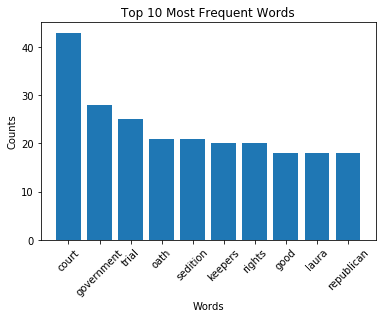

In [6]:
# Let's explore the first transcript
plot_word_counts(data_maddow['wc_dict'][0])

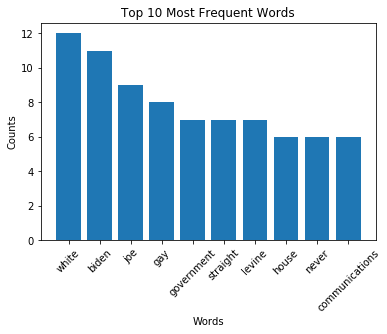

In [7]:
plot_word_counts(data_carlson['wc_dict'][0])

In [11]:
def plot_word_counts_over_time(df, host):
    # Create a dictionary to store the frequency of each word over time
    word_frequencies = {}

    # Iterate over the rows in the dataframe
    for i, row in df.iterrows():
        # Get the word count dictionary for this row
        word_counts = row['wc_dict']

        # Add the word counts for this row to the dictionary
        for word, count in word_counts.items():
            if word not in word_frequencies:
                word_frequencies[word] = []
            word_frequencies[word].append((row['timestamp'], count))

    # Sort the words by the total frequency across all word count dictionaries
    sorted_words = sorted(word_frequencies.keys(), key=lambda word: sum(count for name, count in word_frequencies[word]), reverse=True)

    # Plot the top 10 most frequent words
    for i, word in enumerate(sorted_words[:10]):
        x, y = zip(*word_frequencies[word])
        plt.plot(x, y, label=word)
    
    title = "Top 10 Most Frequent Words Over Time: " + host
    
    plt.legend()
    plt.xlabel("Timestamp")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()



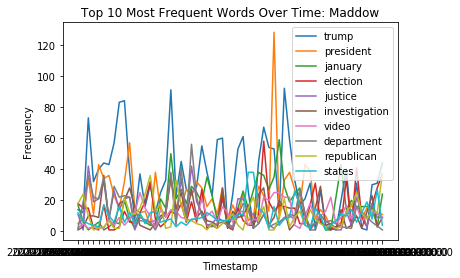

In [12]:
plot_word_counts_over_time(data_maddow, "Maddow")

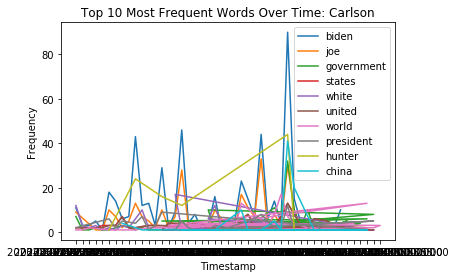

In [13]:
plot_word_counts_over_time(data_carlson, "Carlson")